## Introdução ao SymPy

(Fonte: http://www.sympy.org/en/index.html)

Um sistema de computação algébrica e simbólica - em inglês *CAS (Computer Algebra System)* é um software com a capacidade de manipular expressões matemáticas em forma simbólica e capacidade de realizar cálculos numéricos sobre as expressões matemáticas.

**Sympy** é um módulo em Python para computação simbólica.

Não é o único, __[vejamos uma lista](https://en.wikipedia.org/wiki/List_of_computer_algebra_systems) __

### Panorâmica geral


In [1]:
from sympy import *

In [2]:
x, y, z, t = symbols('x y z t')

In [3]:
k, m, n = symbols('k m n', integer=True)

In [4]:
f, g, h = symbols('f g h', cls=Function)

In [5]:
init_printing()

In [6]:
limit(sin(x)/x, x, 0)

In [7]:
integrate(1/x, x)

In [8]:
a = Integral((3*x**2 + x), x)

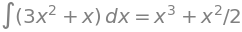

In [9]:
Eq(a, a.doit())

In [10]:
a = Integral (cos(x) * exp(x), x)

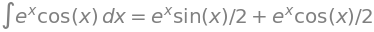

In [11]:
Eq(a, a.doit())

#### Recursos online

+ __[SymPy Gamma](http://gamma.sympy.org/)__

+ __[SymPy Online Shell](http://live.sympy.org/)__

+ __[SciPy 2013 SymPy Tutorial](http://certik.github.io/scipy-2013-tutorial/html/tutorial/intro.html)__

### Visão gradual

In [12]:
# Comecemos com um exemplo. 
# Se quisessemos apenas calcular uma raíz quadrada poderíamos fazer
import math
math.sqrt(9)

In [13]:
# o que é útil para quadrados perfeitos, como 9. 
#
# Para um valor que não seja um quadrado perfeito, podemos ter
math.sqrt(8)

In [14]:
# Com o sympy, por omissão temos a versão simplificada
# import sympy
sqrt(8)

In [15]:
# Podemos ter expressões
expr = x + 1
expr2 = expr ** 2

In [16]:
# A expressão expr2 é mantida simplificada
print(expr2)

(x + 1)**2


In [17]:
# poque podemos pretender tê-la fatorizada
factor(expr2)

In [18]:
# ou expandida
expand(expr2)

In [19]:
# ou escolher avaliar a expressão para x = 4
expr2.subs(x, 4)


In [20]:
expr3 = (expr2 + 2*x)
print(expr3)


2*x + (x + 1)**2


In [21]:
expand(expr3)

#### Outros exemplos

__[Computação simbólica avançada](http://certik.github.io/scipy-2013-tutorial/html/tutorial/intro.html#the-power-of-symbolic-computation)__

#### Cuidados a ter

Na criação de módulos há que ter em atenção a distinção entre as entidades e métodos padrão em Python e símbolos e funções de lógica simbólica.

In [22]:
# %reset

In [23]:
from sympy import *

In [24]:
# Posso fazer
y = 1
expr1 = y + 1
print(expr1)

2


In [25]:
# Mas se fizer
try:
    expr = x + 1 # como x é uma variável, ainda não definida, terei um erro
except NameError as err:   
    print (err)

In [26]:
# É necessário indicar que x é um símbolo
x = symbols('x')

In [27]:
# e então já posso definir a expressão
expr = x + 1

In [28]:
print(expr)

x + 1


In [29]:
# Se pretender que a expressão expr seja avaliada para  x = 2, 
# devo substituir x por 2 na expressão
expr.subs (x, 2)

Há também que ter algum cuidado com os tipos de dados. 

Ao operarmos:
+ um tipo de Python com um tipo de Python, obtemos um tipo de Python
+ um tipo de Python com um tipo de SymPy, obtemos um tipo de SymPy

In [30]:
type(int (1) + 1)

int

In [31]:
type(Integer (1) + 1)

sympy.core.numbers.Integer

In [32]:
1/2, 1//2

In [33]:
Integer(1)/2

In [34]:
1/2 + 1

In [35]:
Integer(1)/2 + 1 

In [36]:
# E porque estamos a falar da mesma quantidade
1/2 + 1 == Integer(1)/2 + 1 

True

### Operações básicas
#### Substituição

In [37]:
# %reset

In [38]:
from sympy import *

In [39]:
# Já foi referida a substituição de um símbolo por uma constante
x, y = symbols('x y')
expr = (x + 1)**2
expr.subs(x, 4)

In [40]:
# Mas a substituição é mais versátil
expr2 = expr.subs(x, y**2)

In [41]:
expr2

In [42]:
expand(expr2)

In [43]:
# Como as expressões são imutáveis, 
expr = x**y

In [44]:
# a substituição dá origem a uma nova expressão 
expr.subs(x, log(x))

In [45]:
# mas a expressão mantêm-se inalterada
expr

In [46]:
# Podemos, no entanto, redefinir a expressão
expr1 = expr.subs(x, sin(x))

In [47]:
expr1 = expr1.subs(y, 2)

In [48]:
expr1

In [49]:
#Poderíamos ter feito as substituições de uma só vez
expr2 = expr.subs([(x, sin(x)), (y, 2)])

In [50]:
expr1 == expr2

True

#### Expressões simbólicas a partir de strings

In [51]:
# As strings de python podem ser convertidas em expressões simbólicas
str_expr = "x**2 + 3*x - 1/2"
expr_exempl = sympify(str_expr)
expr_exempl

In [52]:
expr_exempl.subs(x, -4)

#### Converter um valor para float(vírgula flutuante)

In [53]:
expr_exempl.subs(x, -4).evalf(2)

In [54]:
expr_exempl.evalf(2, subs={x: -5})

### Simplificação

A função *simplify* tenta traduzir as expressões na sua forma mais simples.

In [55]:
# %reset

In [56]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)


In [57]:
expr = sin(x)**2 + cos(x)**2 ; expr 

In [58]:
simplify(expr)

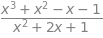

In [59]:
expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1); expr

In [60]:
simplify(expr)

### Simplificação de funções polinomiais/racionais
#### expand

In [61]:
expand((x + 1)**2)

In [62]:
expand((x + 2)*(x - 3))

In [63]:
expand((x + 1)*(x - 2) - (x - 1)*x)

#### factor

In [64]:
factor(x**3 - x**2 + x - 1)

In [65]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

#### collect

In [66]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3; expr

In [67]:
collected_expr = collect(expr, x); collected_expr

#### cancel

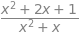

In [68]:
expr = (x**2 + 2*x + 1)/(x**2 + x); expr

In [69]:
cancel(expr)

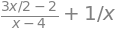

In [70]:
expr = 1/x + (3*x/2 - 2)/(x - 4);  expr


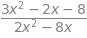

In [71]:
cancel(expr)

#### apart

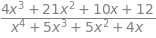

In [72]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x); expr


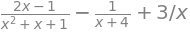

In [73]:
apart(expr)

### Simplificação trignométrica

In [74]:
cos(acos(x))

In [75]:
asin(1)

#### trigsimp

In [76]:
trigsimp(sin(x)**2 + cos(x)**2)

#### expand_trig

In [77]:
expand_trig(sin(x + y))

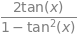

In [78]:
expand_trig(tan(2*x))

###  Potências
ver __[Tutorial](http://docs.sympy.org/latest/tutorial/simplification.html#powers)__

In [79]:
# %reset

In [80]:
from sympy import *

In [81]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [82]:
expr = x**a*x**b; expr

In [83]:
powsimp(x**a*x**b)

In [84]:
expr = x**a*y**a ; expr

In [85]:
powsimp(x**a*y**a)

In [86]:
expr_careful = t**c*z**c ; expr_careful

In [87]:
powsimp(t**c*z**c)

In [88]:
expr = (x**a)**b ; expr

In [89]:
powdenest(expr)

In [90]:
expr_careful = (z**a)**b ; expr_careful

In [91]:
powdenest(expr_careful)

### Exponenciais e logaritmos
ver __[Tutorial](http://docs.sympy.org/latest/tutorial/simplification.html#exponentials-and-logarithms)__

In [92]:
ln(x)

In [93]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)


In [94]:
expand_log(log(x*y))

In [95]:
expand_log(log(x/y))

In [96]:
expand_log(log(x**2))

In [97]:
expand_log(log(x**n))

In [98]:
expand_log(log(z*t))

In [99]:
logcombine(log(x) + log(y))


### Funções especiais

In [100]:
# %reset

In [101]:
from sympy import *

In [102]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

In [103]:
factorial(n)

In [104]:
factorial2(n)

In [105]:
binomial(n, k)

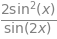

In [106]:
tan(x).rewrite(sin)

In [107]:
tan(x).rewrite(cos)

### Cálculo

In [108]:
# %reset

In [109]:
from sympy import *

In [110]:
x, y, z = symbols('x y z')
#init_printing(use_unicode=True)

In [111]:
diff(cos(x), x) # derivada

In [112]:
diff(exp(x**2), x)

In [113]:
diff(x**4, x, x, x) 

In [114]:
expr = exp(x*y*z) ; expr

In [115]:
deriv = Derivative(expr, x); deriv

In [116]:
deriv.doit()

In [117]:
integrate(cos(x), x)

In [118]:
integrate(exp(-x), (x, 0, oo))

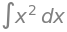

In [119]:
expr = Integral(x**2, x) ; expr

In [120]:
expr.doit()

In [121]:
expr = sin(x)/x ; expr

In [122]:
limit(expr, x, 0)

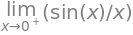

In [123]:
Limit(expr, x, 0 )

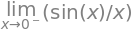

In [124]:
Limit(expr, x, 0, '-')

In [125]:
expr = exp(sin(x))

In [126]:
expr.series(x, 0, 4)